In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt
from sklearn import tree
from pycaret.regression import *


#Hello,
         In this project I'm using the recomandded data from kagle
         and trying to predict if the customer will churn or not after runing
          the needed ML model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Customer churn project/customer_churn_dataset-training-master.csv'
df = pd.read_csv(file_path)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
file_path = '/content/drive/My Drive/Customer churn project/customer_churn_dataset-testing-master.csv'
df_thetestVersion = pd.read_csv(file_path)
df_thetestVersion

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


Now will run some function to check what we need to clean in the data

In [ ]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
missing_values_percent = df.isna().mean() * 100
print(missing_values_percent)

CustomerID           0.000227
Age                  0.000227
Gender               0.000227
Tenure               0.000227
Usage Frequency      0.000227
Support Calls        0.000227
Payment Delay        0.000227
Subscription Type    0.000227
Contract Length      0.000227
Total Spend          0.000227
Last Interaction     0.000227
Churn                0.000227
dtype: float64


In [ ]:
#Exploring the Unique value of each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}:.\n {unique_values}')

Unique values in CustomerID:.
 [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Unique values in Age:.
 [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]
Unique values in Gender:.
 ['Female' 'Male' nan]
Unique values in Tenure:.
 [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36. nan]
Unique values in Usage Frequency:.
 [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10. nan]
Unique values in Support Calls:.
 [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8. nan]
Unique values in Payment Delay:.
 [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3.

In [ ]:
# Calculate the count of '?' in each column
question_mark_counts = df.apply(lambda col: (col == '?').sum())

# Calculate the percentage of '?' in each column
question_mark_percent = (question_mark_counts / len(df)) * 100

# Display the count and percentage of '?' in each column
print(question_mark_counts)
print(question_mark_percent)

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
CustomerID           0.0
Age                  0.0
Gender               0.0
Tenure               0.0
Usage Frequency      0.0
Support Calls        0.0
Payment Delay        0.0
Subscription Type    0.0
Contract Length      0.0
Total Spend          0.0
Last Interaction     0.0
Churn                0.0
dtype: float64


In [ ]:
# Calculate the count of 'Unknown/Invalid' in each column
Unknown_Invalid_counts = df.apply(lambda col: (col == 'Unknown/Invalid').sum())

# Calculate the percentage of 'Unknown/Invalid' in each column
Unknown_Invalid_percent = (Unknown_Invalid_counts / len(df)) * 100

# Display the count and percentage of 'Unknown/Invalid' in each column
print(Unknown_Invalid_counts)
print(Unknown_Invalid_percent)

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
CustomerID           0.0
Age                  0.0
Gender               0.0
Tenure               0.0
Usage Frequency      0.0
Support Calls        0.0
Payment Delay        0.0
Subscription Type    0.0
Contract Length      0.0
Total Spend          0.0
Last Interaction     0.0
Churn                0.0
dtype: float64


In [ ]:
# as the NA values are lees than 1% will go ahed and delete them

# Drop rows with missing values
df = df.dropna()

# Verify if any NA values remain
print(df.isna().sum())


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


# Exploratory Data Analysis

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include='object'))


Summary Statistics for Numerical Columns:
          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min         0.000000       0.

Will use some plot to visulize the data we have

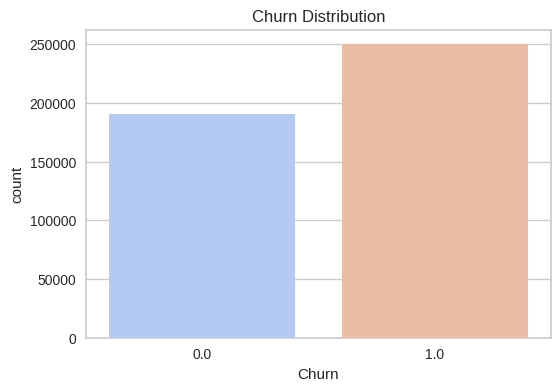

In [ ]:
# the distribution of Churn in our data
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

In [ ]:
# will do some plots for the custimer who churned to see the relation between the custolmer who leaves and other attrbuites
df_churned = df[df['Churn'] == 1]

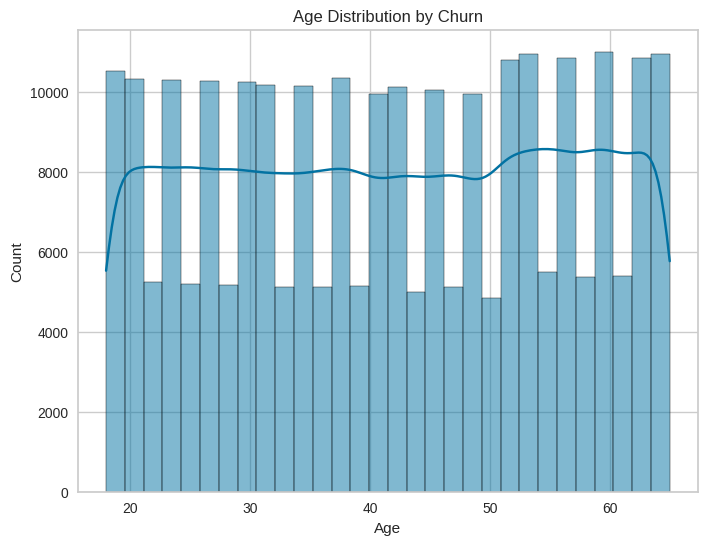

In [ ]:
# Age distribution by churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df_churned, x='Age', kde=True, palette='coolwarm', bins=30)
plt.title('Age Distribution by Churn')
plt.show()


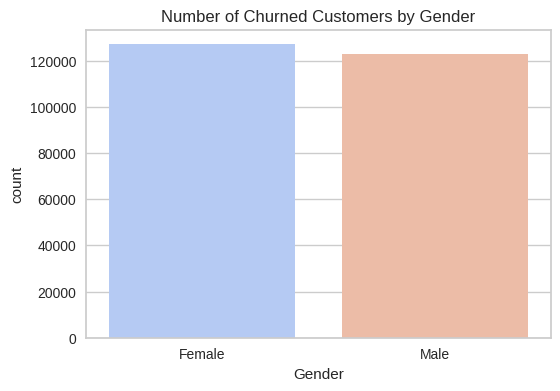

In [ ]:
# Churn rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df_churned, x='Gender', palette='coolwarm')
plt.title('Number of Churned Customers by Gender')
plt.show()


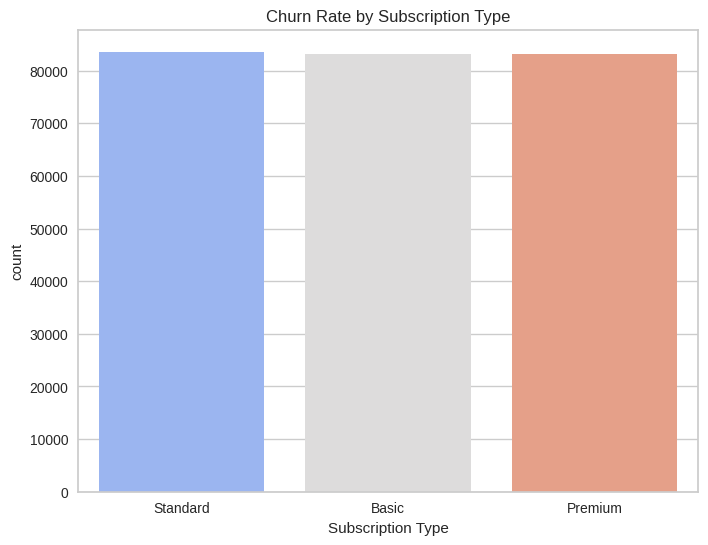

In [ ]:
#Churn Rate by Subscription Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df_churned, x='Subscription Type', palette='coolwarm')
plt.title('Churn Rate by Subscription Type')
plt.show()

In [ ]:
# Count the number of rows where Churn = 1 and Subscription Type = Standard
count1 = len(df[(df['Churn'] == 1) & (df['Subscription Type'] == 'Premium')])
count2 = len(df[(df['Churn'] == 1) & (df['Subscription Type'] == 'Standard')])
count3 = len(df[(df['Churn'] == 1) & (df['Subscription Type'] == 'Basic')])
print( count1, count2, count3)

83173 83616 83210


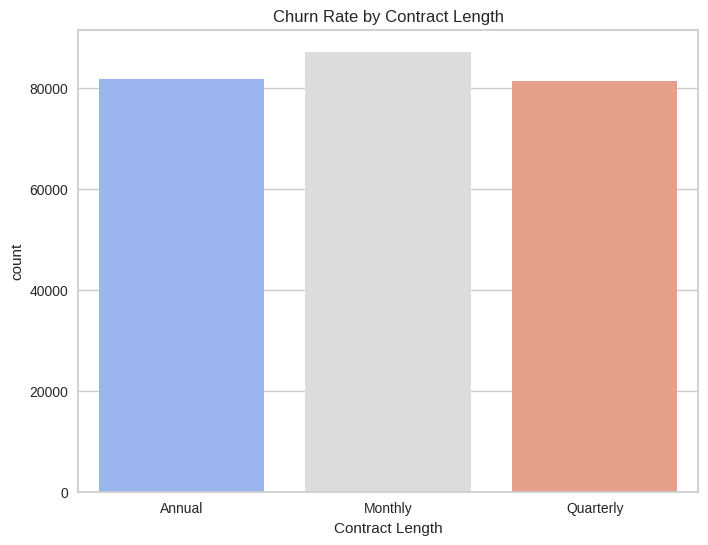

In [ ]:
#Churn Rate by contract length
plt.figure(figsize=(8, 6))
sns.countplot(data=df_churned, x='Contract Length', palette='coolwarm')
plt.title('Churn Rate by Contract Length')
plt.show()

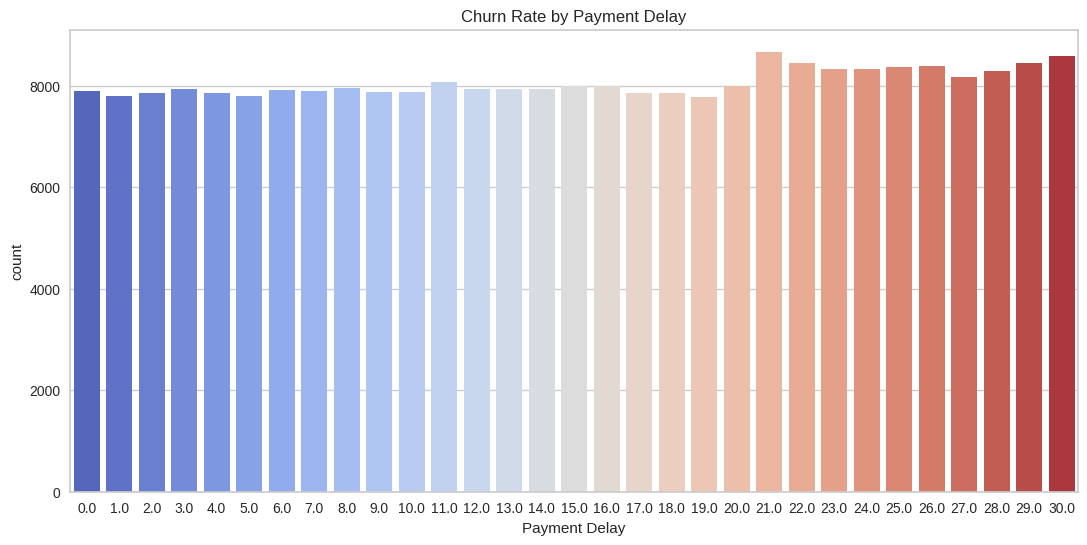

In [ ]:
#Churn Rate by Payment Delay
plt.figure(figsize=(13, 6))
sns.countplot(data=df_churned, x='Payment Delay', palette='coolwarm')
plt.title('Churn Rate by Payment Delay')
plt.show()

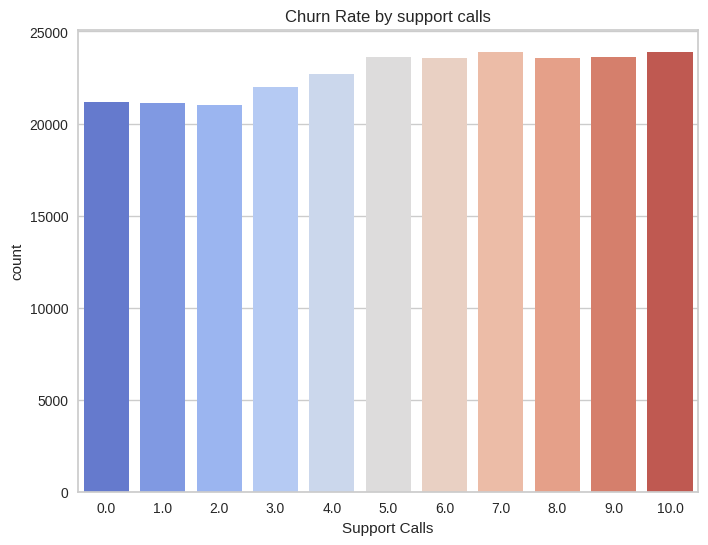

In [ ]:
#Churn Rate by number of calles made to the support
plt.figure(figsize=(8, 6))
sns.countplot(data=df_churned, x='Support Calls', palette='coolwarm')
plt.title('Churn Rate by support calls')
plt.show()

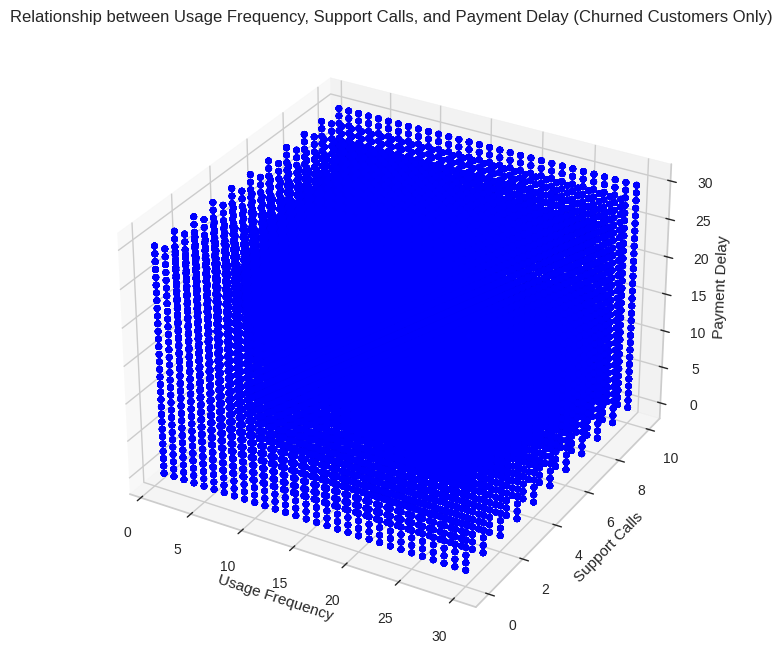

In [ ]:
import matplotlib.pyplot as plt


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df_churned['Usage Frequency'], df_churned['Support Calls'], df_churned['Payment Delay'], c='blue', marker='o')

# Set labels
ax.set_xlabel('Usage Frequency')
ax.set_ylabel('Support Calls')
ax.set_zlabel('Payment Delay')
ax.set_title('Relationship between Usage Frequency, Support Calls, and Payment Delay (Churned Customers Only)')

# Show the plot
plt.show()


# Data Encoding


### to start we are going to do the cahnges for our data as numrical value only
### so we are going to save it in new df name
### and as we have been provided with two datasets, we are going to use one for the train and the other one for the test so we will haved df_num_train and df_num_test and this way there is no need to split the data as we already have one

In [ ]:
df_num_train = df
df_num_test  = df_thetestVersion

In [ ]:
df_num_train['Subscription Type'] = df_num_train["Subscription Type"]. replace ({'Standard' : 1 , 'Basic': 2,'Premium': 3})
df_num_train['Gender'] = df_num_train["Gender"]. replace ({'Female' : 1 , 'Male': 2,})

df_num_test['Subscription Type'] = df_num_test["Subscription Type"]. replace ({'Standard' : 1 , 'Basic': 2,'Premium': 3})
df_num_test['Gender'] = df_num_test["Gender"]. replace ({'Female' : 1 , 'Male': 2,})



In [ ]:
encoder = ce.OrdinalEncoder(cols=['Contract Length'])
encoder.fit(df_num_train)
df_num_train = encoder.transform(df_num_train)


df_num_test

encoder = ce.OrdinalEncoder(cols=['Contract Length'])
encoder.fit(df_num_test)
df_num_test = encoder.transform(df_num_test)



### in the follwing code we are making a new column based on the lenght of how long the coustmer used the service for and put them into 5 sections as showen in the code

In [ ]:
def tenure_lab(df_num_train):
    if df_num_train["Tenure"] <= 12:
        return "1"
    elif (df_num_train["Tenure"] > 12) & (df_num_train["Tenure"] <= 24):
        return "Tenure 12-24"
    elif (df_num_train["Tenure"] > 24) & (df_num_train["Tenure"] <= 48):
        return "Tenure 24-48"
    elif (df_num_train["Tenure"] > 48) & (df_num_train["Tenure"] <= 60):
        return "Tenure 48-60"
    elif df_num_train["Tenure"] > 60:
        return "Tenure >60"

df_num_train["Tenure_cate"] = df_num_train.apply(tenure_lab, axis=1)

and now encode the new column we made into numarical category

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Tenure_cate'])
encoder.fit(df_num_train)
df_num_train = encoder.transform(df_num_train)
df_num_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_cate
0,2.0,30.0,1,39.0,14.0,5.0,18.0,1,1,932.0,17.0,1.0,1
1,3.0,65.0,1,49.0,1.0,10.0,8.0,2,2,557.0,6.0,1.0,2
2,4.0,55.0,1,14.0,4.0,6.0,18.0,2,3,185.0,3.0,1.0,3
3,5.0,58.0,2,38.0,21.0,7.0,7.0,1,2,396.0,29.0,1.0,1
4,6.0,23.0,2,32.0,20.0,5.0,8.0,2,2,617.0,20.0,1.0,1


I will go ahed and copy every encoding I made into my testing data

In [ ]:
def tenure_lab(df_num_test):
    if df_num_test["Tenure"] <= 12:
        return "1"
    elif (df_num_test["Tenure"] > 12) & (df_num_test["Tenure"] <= 24):
        return "Tenure 12-24"
    elif (df_num_test["Tenure"] > 24) & (df_num_test["Tenure"] <= 48):
        return "Tenure 24-48"
    elif (df_num_test["Tenure"] > 48) & (df_num_test["Tenure"] <= 60):
        return "Tenure 48-60"
    elif df_num_test["Tenure"] > 60:
        return "Tenure >60"

df_num_test["Tenure_cate"] = df_num_test.apply(tenure_lab, axis=1)

encoder = ce.OrdinalEncoder(cols=['Tenure_cate'])
encoder.fit(df_num_test)
df_num_test = encoder.transform(df_num_test)
df_num_test.head()

df_num_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_cate
0,1,22,1,25,14,4,27,2,1,598,9,1,1
1,2,41,1,28,28,7,13,1,1,584,20,0,1
2,3,47,2,27,10,2,29,3,2,757,21,0,1
3,4,35,2,9,12,5,17,3,3,232,18,0,2
4,5,53,1,58,24,9,2,1,2,533,18,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,1,33,12,6,21,2,3,947,14,1,1
64370,64371,37,2,6,1,5,22,1,2,923,9,1,2
64371,64372,25,2,39,14,8,30,3,1,327,20,1,1
64372,64373,50,1,18,19,7,22,1,1,540,13,1,4


In [52]:
df_num_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_cate
0,2.0,30.0,1,39.0,14.0,5.0,18.0,1,1,932.00,17.0,1.0,1
1,3.0,65.0,1,49.0,1.0,10.0,8.0,2,2,557.00,6.0,1.0,2
2,4.0,55.0,1,14.0,4.0,6.0,18.0,2,3,185.00,3.0,1.0,3
3,5.0,58.0,2,38.0,21.0,7.0,7.0,1,2,396.00,29.0,1.0,1
4,6.0,23.0,2,32.0,20.0,5.0,8.0,2,2,617.00,20.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,2,54.0,15.0,1.0,3.0,3,1,716.38,8.0,0.0,2
440829,449996.0,25.0,1,8.0,13.0,1.0,20.0,3,1,745.38,2.0,0.0,4
440830,449997.0,26.0,2,35.0,27.0,1.0,5.0,1,3,977.31,9.0,0.0,1
440831,449998.0,28.0,2,55.0,14.0,2.0,0.0,1,3,602.55,2.0,0.0,2


## the encoding is done so will go ahed and check the correlation

In [ ]:
correlation= df_num_train.corr()
correlation

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_cate
CustomerID,1.000000,-0.181977,0.146922,0.044129,0.038455,-0.482894,-0.262029,0.000632,0.001050,0.359289,-0.125356,-0.839365,-0.045185
Age,-0.181977,1.000000,-0.031419,-0.011630,-0.007190,0.158451,0.061738,-0.000590,-0.000334,-0.084684,0.028980,0.218394,0.010559
Gender,0.146922,-0.031419,1.000000,0.007978,0.007978,-0.091212,-0.048449,0.003256,-0.002120,0.066138,0.134786,-0.175395,-0.007660
Tenure,0.044129,-0.011630,0.007978,1.000000,-0.026800,-0.027640,-0.016588,-0.002201,-0.000702,0.019006,-0.006903,-0.051919,-0.699356
Usage Frequency,0.038455,-0.007190,0.007978,-0.026800,1.000000,-0.022013,-0.014470,0.000226,0.000321,0.018631,-0.004662,-0.046101,0.028106
Support Calls,-0.482894,0.158451,-0.091212,-0.027640,-0.022013,1.000000,0.162889,-0.001014,0.000458,-0.221594,0.077684,0.574267,0.029091
Payment Delay,-0.262029,0.061738,-0.048449,-0.016588,-0.014470,0.162889,1.000000,-0.001969,-0.000127,-0.121044,0.042708,0.312129,0.017570
Subscription Type,0.000632,-0.000590,0.003256,-0.002201,0.000226,-0.001014,-0.001969,1.000000,-0.000495,-0.000358,-0.000154,-0.001046,0.001175
Contract Length,0.001050,-0.000334,-0.002120,-0.000702,0.000321,0.000458,-0.000127,-0.000495,1.000000,-0.000642,-0.000035,-0.000093,-0.000471
Total Spend,0.359289,-0.084684,0.066138,0.019006,0.018631,-0.221594,-0.121044,-0.000358,-0.000642,1.000000,-0.056890,-0.429355,-0.021452


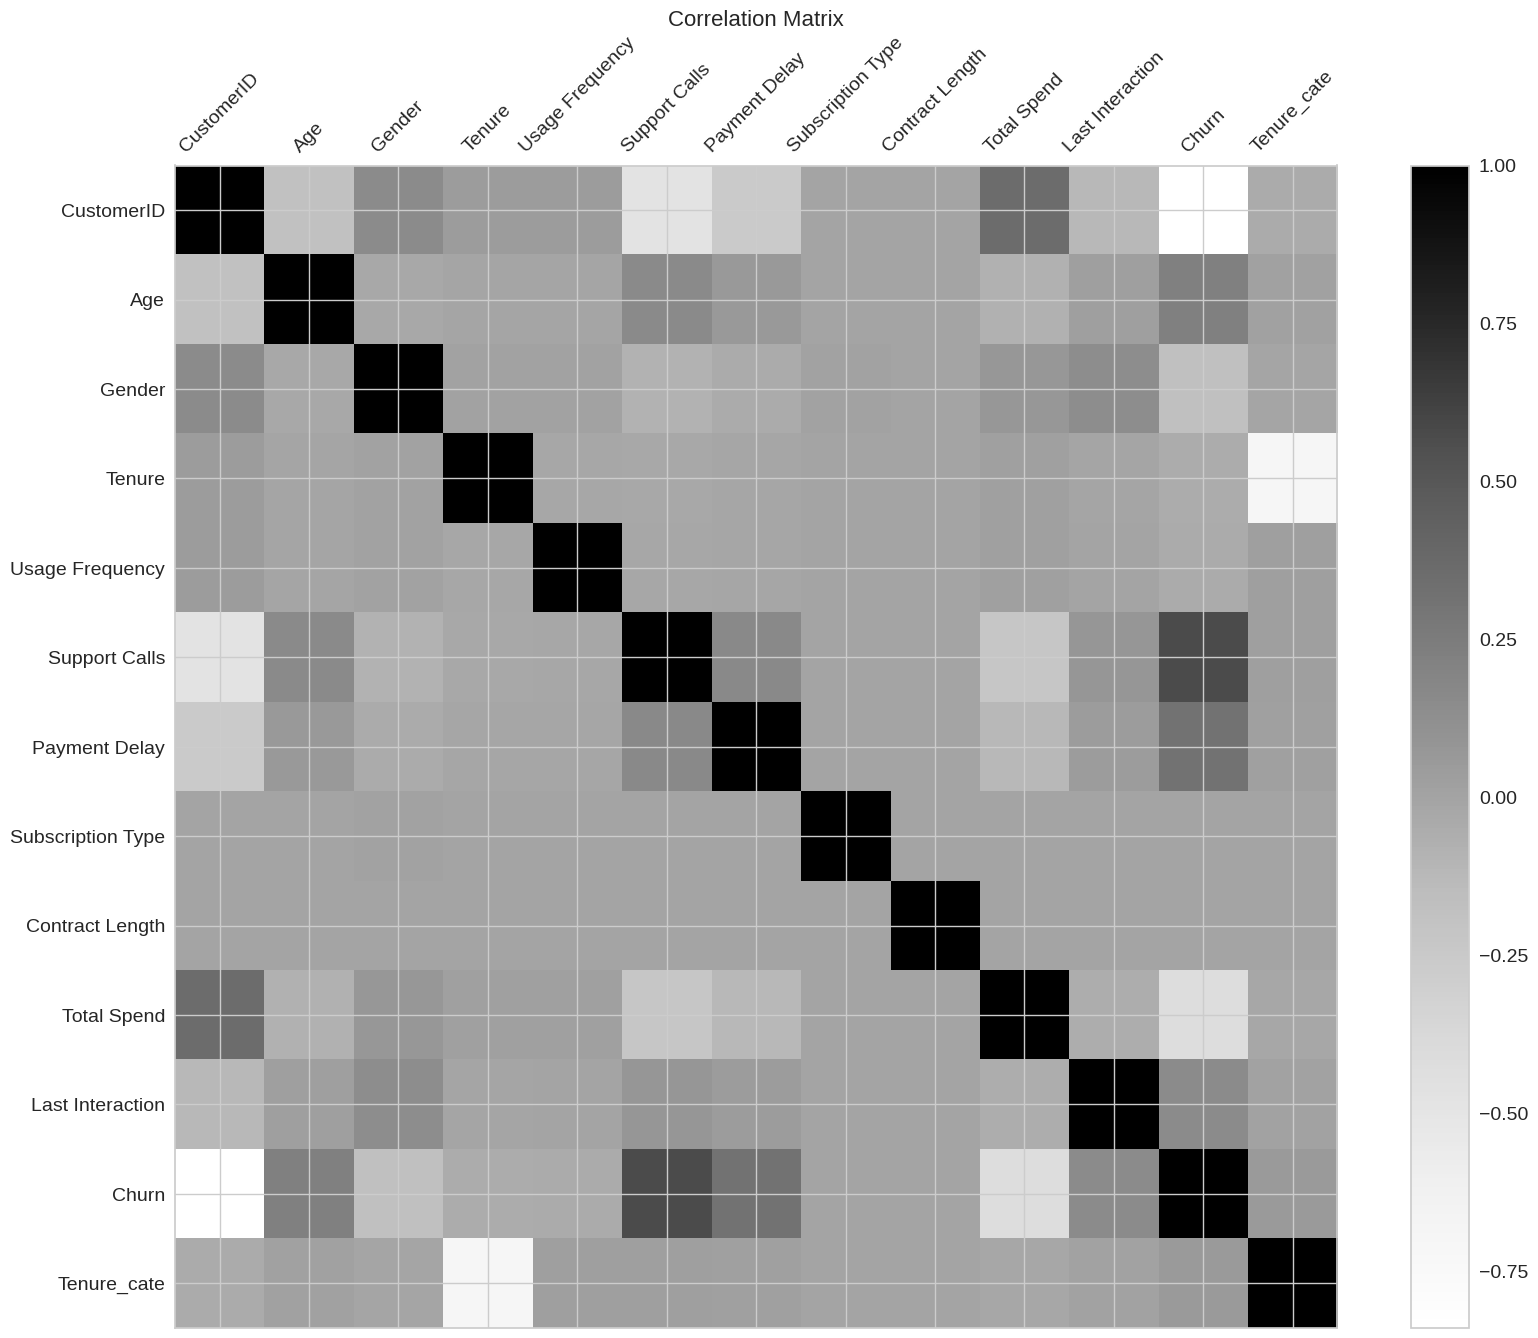

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_num_train.corr(), fignum=f.number)
plt.xticks(range(df_num_train.select_dtypes(['number']).shape[1]), df_num_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_num_train.select_dtypes(['number']).shape[1]), df_num_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [121]:
df_num_train = df_num_train.drop(['CustomerID'], axis = 1)
x_train = df_num_train.drop(['Churn'], axis = 1)
x_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Tenure_cate
0,30.0,1,39.0,14.0,5.0,18.0,1,1,932.0,17.0,1
1,65.0,1,49.0,1.0,10.0,8.0,2,2,557.0,6.0,2
2,55.0,1,14.0,4.0,6.0,18.0,2,3,185.0,3.0,3
3,58.0,2,38.0,21.0,7.0,7.0,1,2,396.0,29.0,1
4,23.0,2,32.0,20.0,5.0,8.0,2,2,617.0,20.0,1


In [122]:
y_train = df_num_train['Churn']
y_train.head()

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [123]:
df_num_test = df_num_test.drop(['CustomerID'], axis = 1)
x_test = df_num_test.drop(['Churn'], axis = 1)
x_test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Tenure_cate
0,22,1,25,14,4,27,2,1,598,9,1
1,41,1,28,28,7,13,1,1,584,20,1
2,47,2,27,10,2,29,3,2,757,21,1
3,35,2,9,12,5,17,3,3,232,18,2
4,53,1,58,24,9,2,1,2,533,18,3


In [124]:
y_test = df_num_test['Churn']
y_test.head()

,Churn
0,1
1,0
2,0
3,0
4,0


In [125]:
LR=LogisticRegression(random_state=78)
LR.fit(x_train,y_train)

LogisticRegression(random_state=78)

In [126]:
y_pred=LR.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [127]:
LR.coef_

array([[ 0.03718234, -0.5877811 , -0.00494983, -0.00768018,  0.70070341,
         0.09990546, -0.10547036, -0.104634  , -0.00496313,  0.04846281,
        -0.10322142]])

In [128]:
CM=confusion_matrix(y_test,y_pred)
CM


array([[ 8134, 25747],
       [  588, 29905]])

# LogisticRegression Rsults

In [129]:
accuracy_score(y_test,y_pred)

0.5909062665051108

In [130]:
precision_score(y_test,y_pred)

0.5373571479910875

In [131]:
f1_score(y_test,y_pred)

0.6942945034534797

In [132]:
accuracy_score(y_test,y_pred)

0.5909062665051108

now DecisionTreeClassifier


In [133]:
DT=DecisionTreeClassifier(random_state=5,max_depth=10)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=5)

In [134]:
y_pred_tree=DT.predict(x_test)

# DecisionTreeClassifier Result

In [135]:
accuracy_score(y_test, y_pred_tree)


0.507114673625998

In [136]:
CM_tree = confusion_matrix(y_test, y_pred_tree)
CM_tree


array([[ 2171, 31710],
       [   19, 30474]])

In [137]:
precision_score(y_test, y_pred_tree)

0.4900617522192204

In [138]:
recall_score(y_test, y_pred_tree)

0.9993769061751877

In [139]:
f1_score(y_test, y_pred_tree)

0.6576388963820581

as we see here the Decision tree Classifier doing better but still the acuracy is around 50%

In [142]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


# New customer data as input (you can change these values)
new_customer_data = {
    'Age': [30],
    'Gender': ['Female'],
    'Tenure': [12],
    'Usage Frequency': [10],
    'Support Calls': [3],
    'Payment Delay': [5],
    'Subscription Type': [3],
    'Contract Length': ['2'],
    'Total Spend': [400],
    'Last Interaction': [5],
    'Tenure_cate': [3]
}

# Convert to DataFrame
new_customer_df = pd.DataFrame(new_customer_data)

new_customer_df['Gender'] = new_customer_df['Gender'].map({'Male': 0, 'Female': 1})
new_customer_df['Subscription Type'] = new_customer_df['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
new_customer_df['Contract Length'] = new_customer_df['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual': 2})



# Predict churn (assuming model is your trained DecisionTreeClassifier)
churn_prediction = DT.predict(new_customer_df)

# Output the result
if churn_prediction[0] == 1:
    print("The customer is predicted to churn.")
else:
    print("The customer is predicted not to churn.")


The customer is predicted to churn.
